In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [16]:
# filtro smoothing
# filtros pasabajas: las sumatorias del kernel dan 1

kernel = np.ones((3,3), dtype=np.uint8)/9
# 5x5 7x7 11x11
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

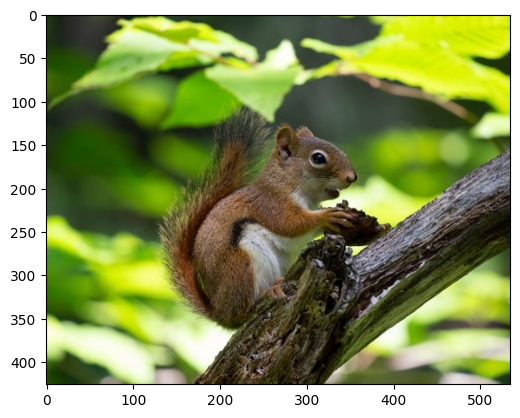

In [17]:
img = cv.imread("images/squirrel_cls.jpg")[:,:,::-1]
plt.imshow(img, cmap="gray")

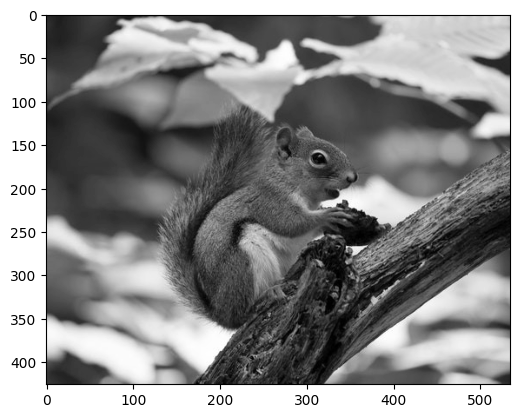

In [18]:
img_grey = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(img_grey, cmap="gray")

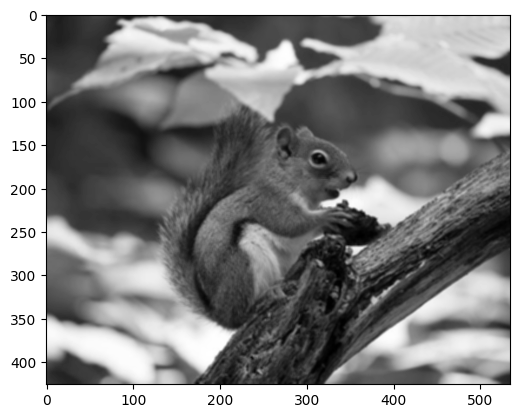

In [19]:
 img_smoothed = cv.filter2D(img_grey, -1, kernel)
 plt.imshow(img_smoothed, cmap="gray")

In [20]:
def make_sqare_kernels(n: int):
   return np.ones((n,n))/(n*n) 

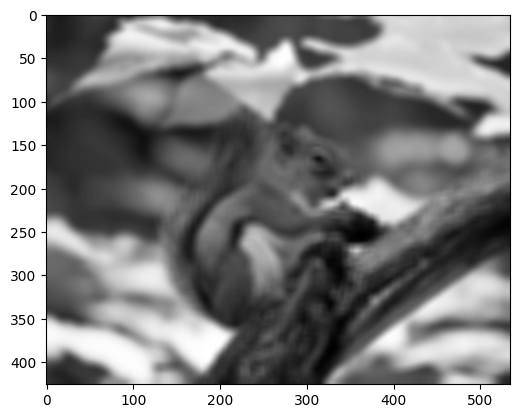

In [21]:
kernel11 = make_sqare_kernels(11)
img_smoothed = cv.filter2D(img_grey, -1, kernel11)
plt.imshow(img_smoothed, cmap="gray")

# Gaussian Kernel

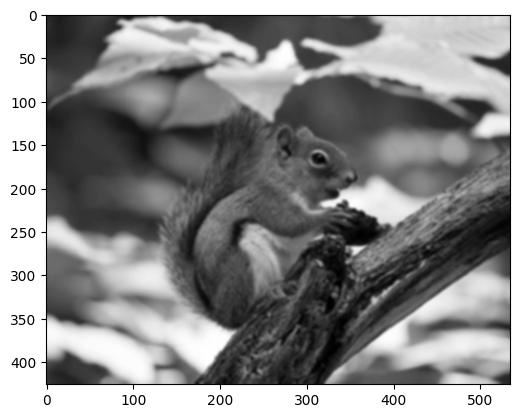

In [47]:
img_gaussian = cv.GaussianBlur(img_grey, (5, 5), 1.5)
plt.imshow(img_gaussian, cmap="gray")

In [38]:
make_sqare_kernels(5).sum()

1.0

# Filtros pasa altas
La sumatoria de sus elementos da 0
## Filtros Sharpening
Para saber donde hay transiciones bruscas (ej. cara y fondo)
### Laplacian
No está binarizado

In [35]:
# kernel laplaciano
kernel_laplaciano = np.array([[0, -1, 0], 
                              [-1, 4, -1],
                              [0, -1, 0]])

kernel_laplaciano2 = np.array([[0, 1, 0], 
                              [1, -4, 1],
                              [0, 1, 0]])
                              
kernel_laplaciano3 = np.array([[1, 1, 1], 
                              [1, -8, 1],
                              [1, 1, 1]])


In [39]:
kernel_laplaciano.sum()

0

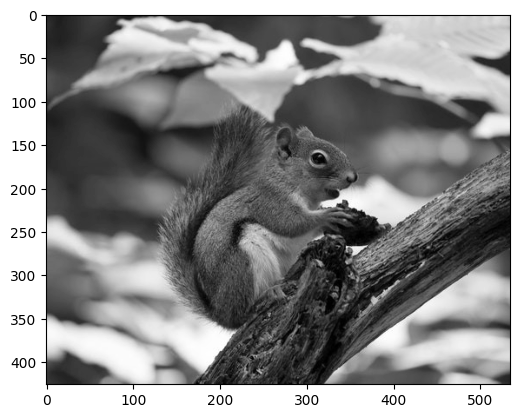

In [36]:
plt.imshow(img_grey, cmap="gray")

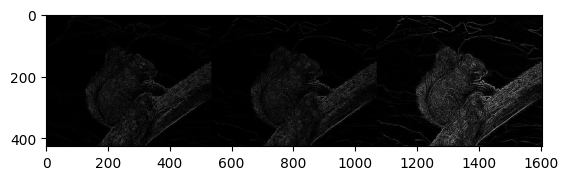

In [37]:
img_laplaciano = cv.filter2D(img_grey, -1, kernel_laplaciano)
img_laplaciano2 = cv.filter2D(img_grey, -1, kernel_laplaciano2)
img_laplaciano3 = cv.filter2D(img_grey, -1, kernel_laplaciano3)
# usa un hstack para mostrar las imagenes
plt.imshow(np.hstack([img_laplaciano, img_laplaciano2, img_laplaciano3]), cmap="gray")

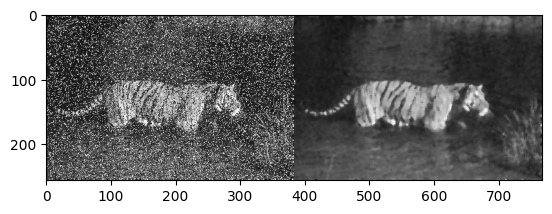

In [46]:
img_noise = cv.imread("images/s-p-noise.jpeg", 0)
# imagen con 25% de ruido
# pixeles blancos y negros
img_no_noise = cv.medianBlur(img_noise, 5)


plt.imshow(np.hstack([img_noise, img_no_noise]), cmap="gray")

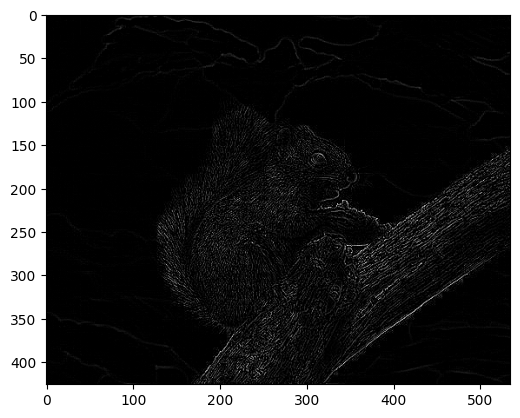

In [49]:
# kernel laplaciano (laplace)
plt.imshow(cv.Laplacian(img_grey,-1,ksize=1), "gray")